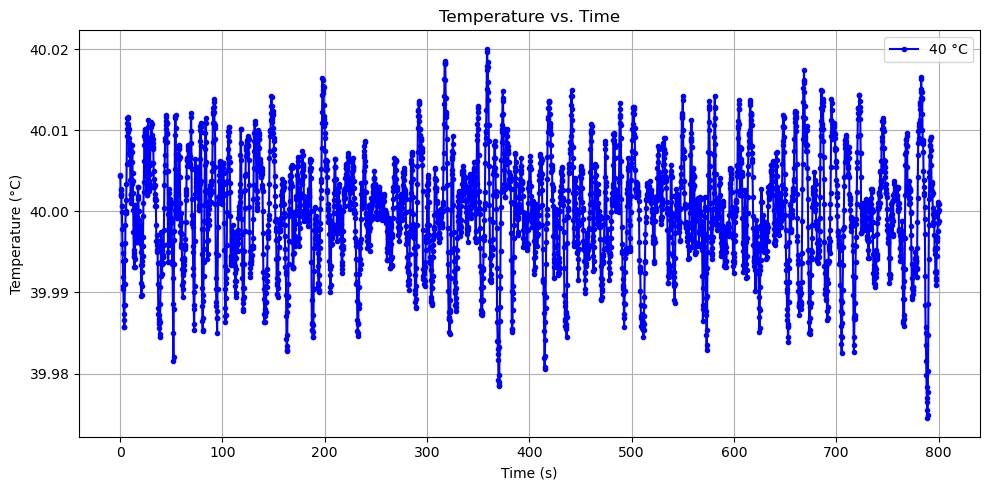

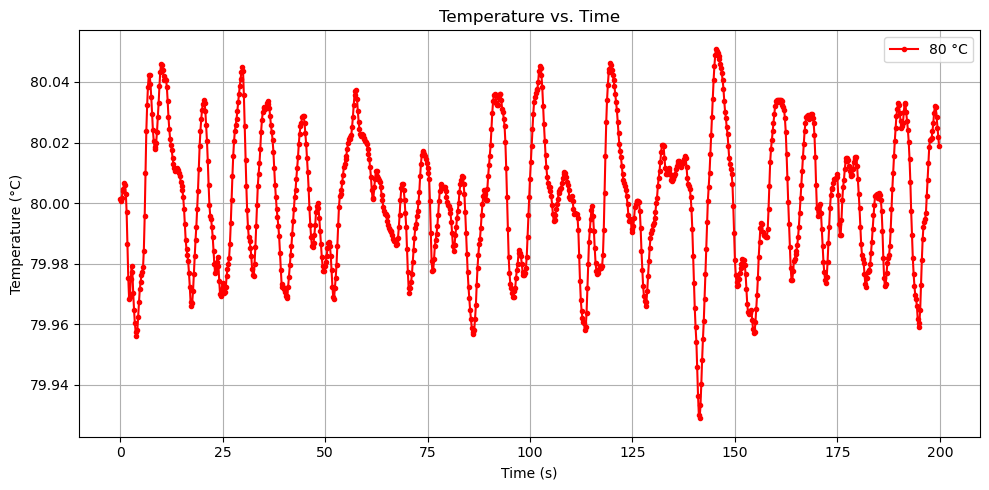

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# Helper to load a dataset
# ---------------------------
def load_data(filename, delimiter='\t',cut=None):
    data = np.loadtxt(filename, delimiter=delimiter)
    t = data[:, 0][:cut]
    T = data[:, 1][:cut]
    C_nF = data[:, 2][:cut]
    return t, T, C_nF

# ---------------------------
# Load both datasets
# ---------------------------
file_40 = "Data/40_40T_1dT_4000N.lvm"
file_80 = "Data/80_80T_1dT_1000N.lvm"

t_40, T_40, C_40 = load_data(file_40,cut=9998)
t_80, T_80, C_80 = load_data(file_80)

# ---------------------------
# Plot T vs t for both
# ---------------------------
plt.figure(figsize=(10, 5))
plt.plot(t_40, T_40, '.-',label='40 °C', color='blue')
plt.xlabel("Time (s)")
plt.ylabel("Temperature (°C)")
plt.title("Temperature vs. Time")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(t_80, T_80,  '.-',label='80 °C', color='red')
plt.xlabel("Time (s)")
plt.ylabel("Temperature (°C)")
plt.title("Temperature vs. Time")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



Stable interval for the 40°C dataset:
    From t=359.003 s to t=788.009 s (indices 1792 to 3937), with 2146 points
Stable interval for the 80°C dataset:
    From t=60.001 s to t=85.003 s (indices 300 to 425), with 126 points


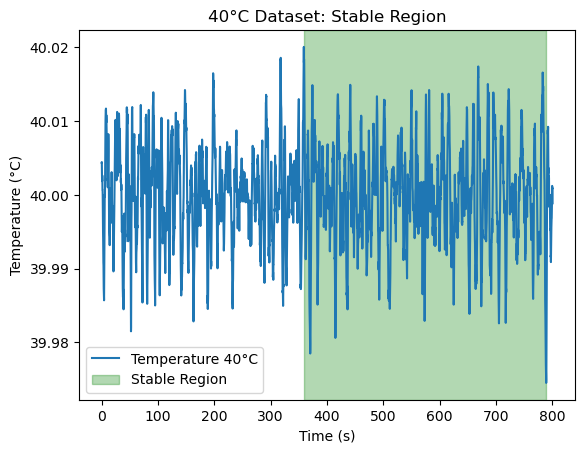

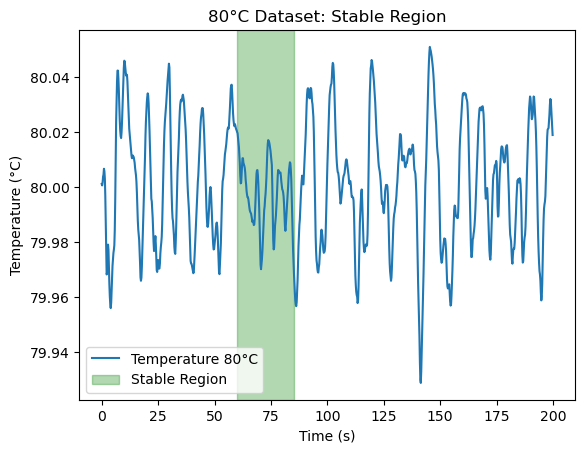

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------------------------------------
# 1. Define a helper function to find the longest stable region based on max-min difference
# ---------------------------------------------------------------------
def find_stable_region(time, temperature, tol=0.05):
    """
    Identifies the longest contiguous time interval where the difference between 
    the maximum and minimum temperature is less than tol.
    
    Parameters:
    -----------
    time : array-like
        Array of time points.
    temperature : array-like
        Array of temperature readings corresponding to each time point.
    tol : float
        Tolerance for the max-min temperature difference to consider the region stable.
        
    Returns:
    --------
    stable_interval : tuple
        (start_time, end_time) of the longest contiguous stable interval.
    indices : tuple
        (start_index, end_index) corresponding to the stable interval.
    best_length : int
        Number of points in the stable interval.
    """
    best_start, best_end, best_length = 0, 0, 0
    n = len(temperature)
    for i in range(n):
        current_min = temperature[i]
        current_max = temperature[i]
        for j in range(i, n):
            current_min = min(current_min, temperature[j])
            current_max = max(current_max, temperature[j])
            if (current_max - current_min) > tol:
                break  # Temperature variation exceeded tolerance; end current window
            length = j - i + 1
            if length > best_length:
                best_length = length
                best_start, best_end = i, j
    return (time[best_start], time[best_end]), (best_start, best_end), best_length

# ---------------------------------------------------------------------
# 2. Analyze the 40°C dataset using the modified logic
# ---------------------------------------------------------------------
# Read the 40°C data file. Adjust the file path as needed.
df_40 = pd.read_csv(
    "Data/40_40T_1dT_4000N.lvm", 
    sep=r'\s+', 
    header=None,
    names=["Time", "Temperature", "Extra"]
)

stable_interval_40, indices_40, length_40 = find_stable_region(
    df_40["Time"].values, 
    df_40["Temperature"].values, 
    tol=0.04
)

print("Stable interval for the 40°C dataset:")
print("    From t={:.3f} s to t={:.3f} s (indices {} to {}), with {} points".format(
    stable_interval_40[0], stable_interval_40[1], indices_40[0], indices_40[1], length_40))

# ---------------------------------------------------------------------
# 3. Analyze the 80°C dataset using the modified logic
# ---------------------------------------------------------------------
# Read the 80°C data file. Adjust the file path as needed.
df_80 = pd.read_csv(
    "Data/80_80T_1dT_1000N.lvm", 
    sep=r'\s+', 
    header=None,
    names=["Time", "Temperature", "Extra"]
)

stable_interval_80, indices_80, length_80 = find_stable_region(
    df_80["Time"].values, 
    df_80["Temperature"].values, 
    tol=0.05
)

print("Stable interval for the 80°C dataset:")
print("    From t={:.3f} s to t={:.3f} s (indices {} to {}), with {} points".format(
    stable_interval_80[0], stable_interval_80[1], indices_80[0], indices_80[1], length_80))

# ---------------------------------------------------------------------
# 4. (Optional) Plot the datasets with the stable regions highlighted
# ---------------------------------------------------------------------
# Plot for 40°C dataset
plt.figure()
plt.plot(df_40["Time"], df_40["Temperature"], label="Temperature 40°C")
plt.axvspan(stable_interval_40[0], stable_interval_40[1], color='green', alpha=0.3, label="Stable Region")
plt.xlabel("Time (s)")
plt.ylabel("Temperature (°C)")
plt.title("40°C Dataset: Stable Region")
plt.legend()
plt.show()

# Plot for 80°C dataset
plt.figure()
plt.plot(df_80["Time"], df_80["Temperature"], label="Temperature 80°C")
plt.axvspan(stable_interval_80[0], stable_interval_80[1], color='green', alpha=0.3, label="Stable Region")
plt.xlabel("Time (s)")
plt.ylabel("Temperature (°C)")
plt.title("80°C Dataset: Stable Region")
plt.legend()
plt.show()
